In [1]:
from idiva.db.ncbi_scraper import get_functional_consequence_from_SNP
from pathlib import Path
from idiva.io import ReadVCF
import os
import pandas as pd

BASE = (Path(os.path.abspath("database_exploration.ipynb")).parent.parent.parent) / "tests/data_for_tests/large_head"

PATHS = {
    'ctrl': BASE / "control.vcf",
    'case': BASE / "case_processed.vcf",
}
query_functional_consequences = False

In [2]:
if query_functional_consequences:
    functional_consequence_set = {'non_coding_transcript_variant,intron_variant,genic_downstream_transcript_variant'}

    functional_consequence_df = pd.DataFrame()


    with open(PATHS['ctrl'], mode='r') as fd:
        for elem in ReadVCF(fd):
            info = get_functional_consequence_from_SNP(elem.id)
            functional_consequence_set.add(info)
            functional_consequence_df = functional_consequence_df.append({'rs_ID':elem.id,'functional_consequence': info}, ignore_index=True)


    with open(PATHS['case'], mode='r') as fd:
        for elem in ReadVCF(fd):
            info = get_functional_consequence_from_SNP(elem.id)
            functional_consequence_set.add(info)
            functional_consequence_df = functional_consequence_df.append({'rs_ID':elem.id,'functional_consequence': info}, ignore_index=True)



    functional_consequence_df
    print(functional_consequence_set)




In [3]:
clinvar_csv_path = Path(os.path.abspath("database_exploration.ipynb")).parent.parent.parent/ 'data/clinvar.csv'

In [4]:
if not clinvar_csv_path.is_file():
    from idiva.db import clinvar_open
    from idiva.io import ReadVCF
    from idiva.db.clinvar import clinvar_to_df
    with clinvar_open(which='vcf_37') as fd:
        pdf_clinvar = clinvar_to_df(ReadVCF(fd))
    pdf_clinvar.to_csv(clinvar_csv_path, index = False)
else:
    pdf_clinvar = pd.read_csv(clinvar_csv_path)

777889it [00:29, 26019.54it/s, reading clinvar file]


In [5]:
print(pdf_clinvar.columns)

Index(['chrom', 'pos', 'id', 'ref', 'alt', 'qual', 'filter', 'format',
       'samples', 'ALLELEID', 'CLNDISDB', 'CLNDN', 'CLNHGVS', 'CLNREVSTAT',
       'CLNSIG', 'CLNVC', 'CLNVCSO', 'GENEINFO', 'MC', 'ORIGIN', 'OMIM_id',
       'RS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNVI', 'CLNSIGCONF',
       'CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL', 'DBVARID'],
      dtype='object')


In [6]:
from pathlib import Path

from tcga.utils import download
download_cache = (Path(os.path.abspath("database_exploration.ipynb")).parent.parent.parent.parent / "input/download_cache")
print(download_cache)
assert download_cache.is_dir()

/Users/Hendrik/Documents/master3/Computaitonal_Biomedicine/Team03/project2/input/download_cache


In [7]:
download = download.to(abs_path=download_cache)

URLS = {
    'ctrl': "https://public.bmi.inf.ethz.ch/eth_intern/teaching/cbm_2020/cbm_2020_project2/control.vcf",
    'case': "https://public.bmi.inf.ethz.ch/eth_intern/teaching/cbm_2020/cbm_2020_project2/case_processed.vcf",
}
case_control_csv_path = Path(os.path.abspath("database_exploration.ipynb")).parent.parent.parent.parent / "input/head/case_control.csv"

In [8]:
if case_control_csv_path.is_file():
    pdf_case_control = pd.read_csv(case_control_csv_path)
else:
    from idiva.io import ReadVCF
    from idiva.clf.df import v0_df, join
    dfs = {}

    for k in URLS:
        with download(URLS[k]).now.open() as fd:
            dfs[k] = v0_df(ReadVCF(fd))

    pdf_case_control = join(case=dfs['case'], ctrl=dfs['ctrl'])
    pdf_case_control.to_csv(case_control_csv_path,index = False)


In [9]:
pdf_case_control.head()

,CHROM,POS,ID,ALT0_case,ALT1_case,ALT2_case,ALT0_ctrl,ALT1_ctrl,ALT2_ctrl
0,17,52,rs556541063,314.0,0.0,0.0,500.0,0.0,0.0
1,17,56,rs145615430,314.0,0.0,0.0,498.0,2.0,0.0
2,17,78,rs148170422,311.0,3.0,0.0,499.0,1.0,0.0
3,17,80,rs183779916,313.0,1.0,0.0,497.0,3.0,0.0
4,17,92,rs562410061,314.0,0.0,0.0,500.0,0.0,0.0


# With pandas
## In total, 10313 of the 2361508 variants in the case-control vcf match with the clinvar vcf. 1536 of those are meaningless

In [10]:
pdf_clinvar.head()

,chrom,pos,id,ref,alt,qual,filter,format,samples,ALLELEID,...,RS,AF_ESP,AF_EXAC,AF_TGP,CLNVI,CLNSIGCONF,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,DBVARID
0,1,899892,916564,C,A,None,.,None,None,904889,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,949358,967439,C,A,None,.,None,None,960396,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,949391,942967,G,A,None,.,None,None,929889,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,949392,661610,C,T,None,.,None,None,626468,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,949392,661610,C,T,None,.,None,None,626468,...,rs950572063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pdf_clinvar[~pdf_clinvar.RS.isna()]

,chrom,pos,id,ref,alt,qual,filter,format,samples,ALLELEID,...,RS,AF_ESP,AF_EXAC,AF_TGP,CLNVI,CLNSIGCONF,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,DBVARID
4,1,949392,661610,C,T,None,.,None,None,626468,...,rs950572063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,949422,475283,G,A,None,.,None,None,446939,...,rs143888043,0.00546,0.00165,0.00619,NaN,NaN,NaN,NaN,NaN,NaN
8,1,949427,639487,A,G,None,.,None,None,626469,...,rs374095998,0.00008,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,949438,740895,A,G,None,.,None,None,745491,...,rs543999661,NaN,0.00066,0.00120,NaN,NaN,NaN,NaN,NaN,NaN
13,1,949491,659187,G,A,None,.,None,None,626470,...,rs148041041,0.00069,0.00017,0.00020,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924368,MT,16011,690273,A,G,None,.,None,None,677665,...,rs1603225635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
924370,MT,16013,690274,A,G,None,.,None,None,677666,...,rs1603225636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
924372,MT,16015,690276,T,TATTCTCTGTTCTTTC,None,.,None,None,677667,...,rs1603225639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
924374,MT,16017,690275,T,C,None,.,None,None,677668,...,rs201864830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
merge_on_RS = pdf_case_control.merge(pdf_clinvar[~pdf_clinvar.RS.isna()], left_on='ID', right_on='RS', how='inner')

In [13]:
merge_on_RS.head()

,CHROM,POS,ID,ALT0_case,ALT1_case,ALT2_case,ALT0_ctrl,ALT1_ctrl,ALT2_ctrl,chrom,...,RS,AF_ESP,AF_EXAC,AF_TGP,CLNVI,CLNSIGCONF,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,DBVARID
0,17,648189,rs574891003,313.0,1.0,0.0,499.0,1.0,0.0,17,...,rs574891003,NaN,0.00015,0.00060,NaN,NaN,NaN,NaN,NaN,NaN
1,17,1554094,rs147941247,313.0,1.0,0.0,499.0,1.0,0.0,17,...,rs147941247,0.00146,NaN,0.00060,"Illumina_Clinical_Services_Laboratory,Illumina...",NaN,NaN,NaN,NaN,NaN
2,17,1554254,rs75996323,306.0,8.0,0.0,487.0,12.0,1.0,17,...,rs75996323,0.01692,NaN,0.01178,"Illumina_Clinical_Services_Laboratory,Illumina...",NaN,NaN,NaN,NaN,NaN
3,17,1554463,rs369391284,314.0,0.0,0.0,500.0,0.0,0.0,17,...,rs369391284,0.00046,0.00017,0.00020,"Illumina_Clinical_Services_Laboratory,Illumina...","Likely_benign(1),Uncertain_significance(1)",NaN,NaN,NaN,NaN
4,17,1554770,rs1802491,202.0,71.0,41.0,333.0,117.0,50.0,17,...,rs1802491,0.22144,0.11292,0.22963,"Illumina_Clinical_Services_Laboratory,Illumina...",NaN,NaN,NaN,NaN,NaN


In [14]:
merge_on_RS['ID'].isna().sum()

0

In [15]:
len(set(merge_on_RS['ID']))

5038

In [16]:
len(set(merge_on_RS.loc[((merge_on_RS['CLNSIG'] == 'not_provided') | (merge_on_RS['CLNSIG'] == 'Uncertain_significance')), 'ID']))

980

In [17]:
pdf_clinvar['ALLELEID'].isna().sum()

0

In [18]:
pdf_case_control['ID'].isna().sum()

4

# Merging on CHROM and POS
## In total, 12638 of the 2361508 variants in the case-control vcf match with the clinvar vcf. 2636 of those are meaningless

In [19]:
new_df = pd.merge(pdf_case_control.astype({'CHROM':str, 'POS':str}), pdf_clinvar.astype({'chrom':str, 'pos':str}), how='inner', left_on=['CHROM', 'POS'], right_on=['chrom', 'pos'])

In [20]:
len(pdf_case_control)

2361508

In [21]:
len(new_df)


16205

In [22]:
set(new_df['CLNSIG'])

{'Affects',
 'Benign',
 'Benign,_other',
 'Benign/Likely_benign',
 'Benign/Likely_benign,_other',
 'Conflicting_interpretations_of_pathogenicity',
 'Conflicting_interpretations_of_pathogenicity,_risk_factor',
 'Likely_benign',
 'Likely_pathogenic',
 'Pathogenic',
 'Pathogenic,_risk_factor',
 'Pathogenic/Likely_pathogenic',
 'Pathogenic/Likely_pathogenic,_risk_factor',
 'Uncertain_significance',
 'drug_response',
 nan,
 'not_provided',
 'risk_factor'}

In [23]:
new_df['CLNSIG'].isna().sum()


4

In [24]:
new_df.loc[((new_df['CLNSIG'] == 'not_provided') | (new_df['CLNSIG'] == 'Uncertain_significance')), 'CLNSIG'].count()

3535

# Difference of zygosity between case-control vcf / merge_on_RS vcf and case / control

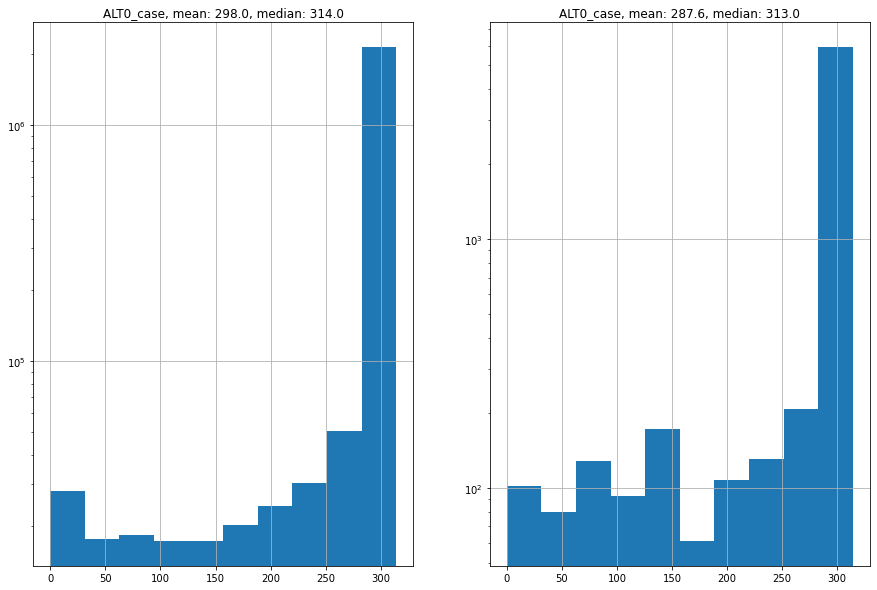

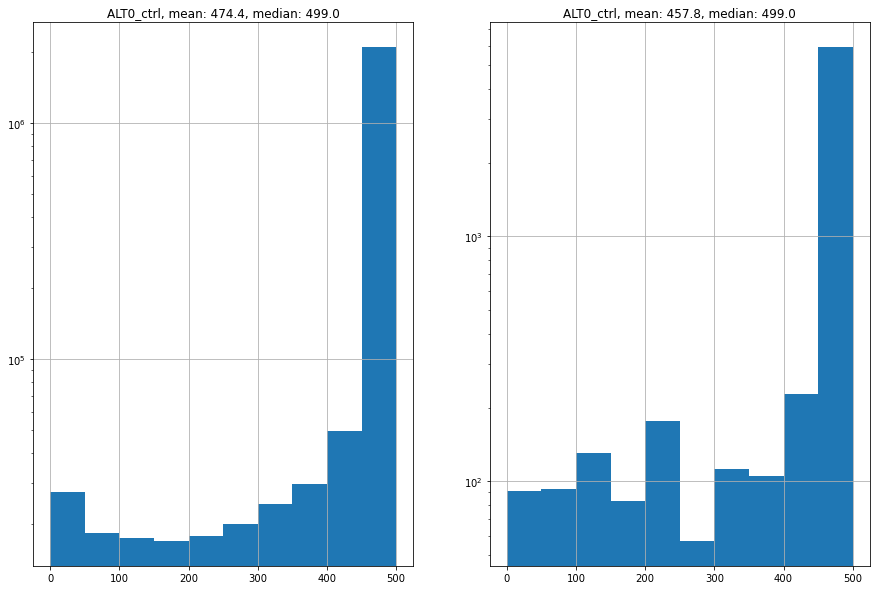

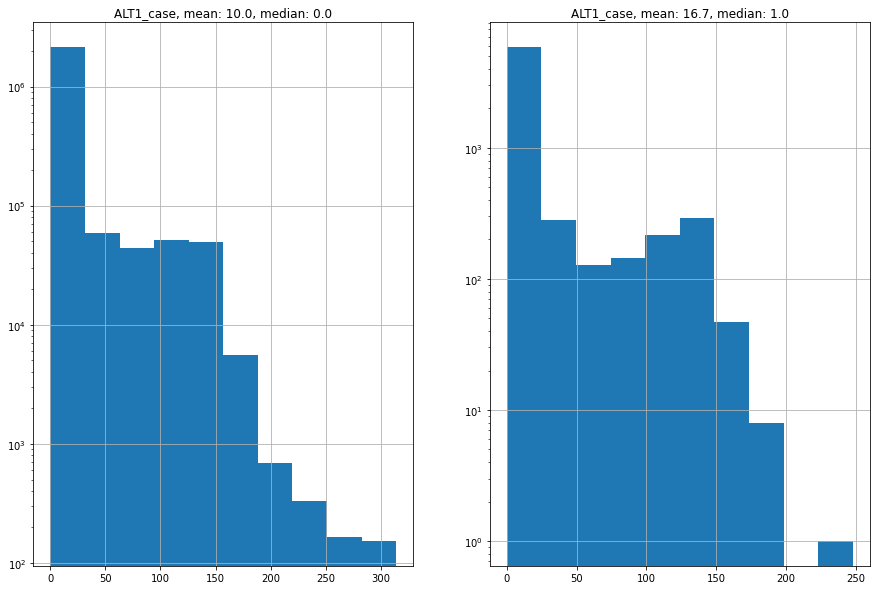

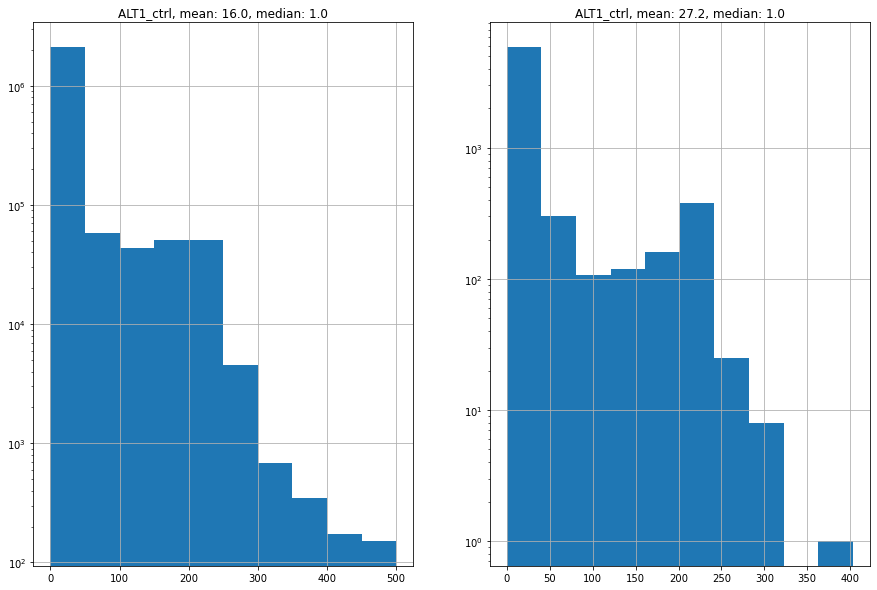

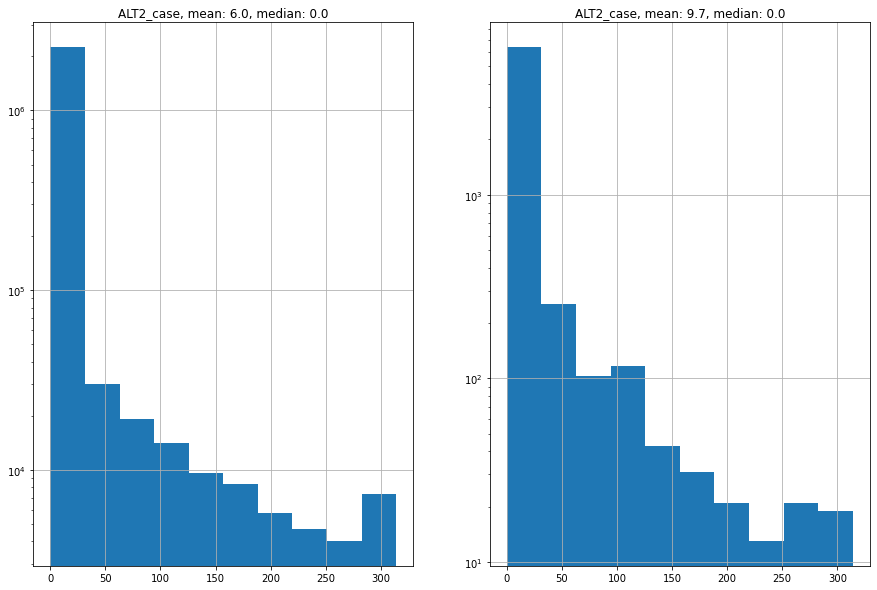

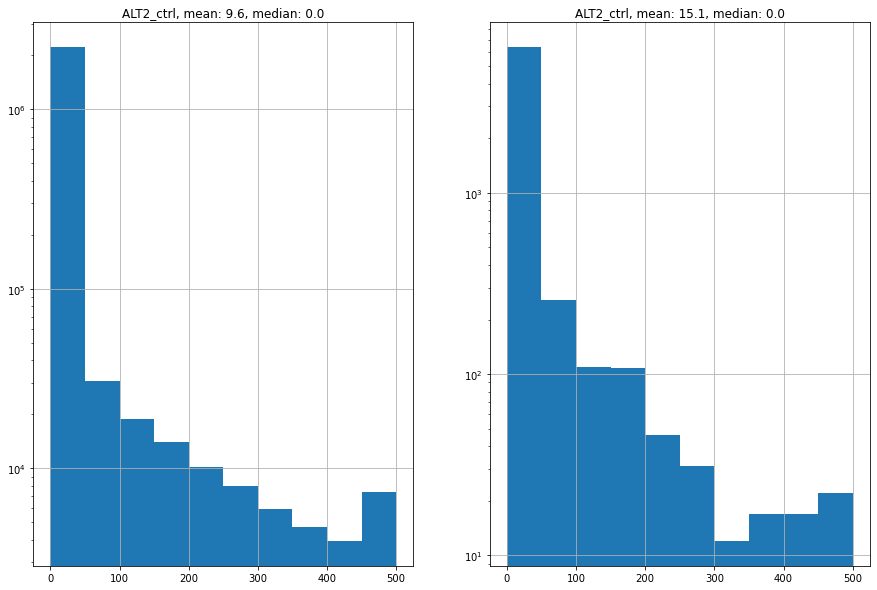

In [25]:
from matplotlib import pyplot as plt

for column in ['ALT0_case','ALT0_ctrl',	'ALT1_case','ALT1_ctrl',	'ALT2_case'		,	'ALT2_ctrl']:
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    plt.title(f'{column}, mean: {pdf_case_control[column].mean().round(1)}, median: {pdf_case_control[column].median().round(1)}')
    pdf_case_control[column].hist(log=True)
    plt.subplot(1,2,2)
    plt.title(f'{column}, mean: {merge_on_RS[column].mean().round(1)}, median: {merge_on_RS[column].median().round(1)}')
    merge_on_RS[column].hist(log=True)

# Difference of zygosity between case-control vcf / clinvar vcf and case / control

In [26]:
pathogenic_merge_on_RS = merge_on_RS.loc[merge_on_RS['CLNSIG'] == 'Pathogenic']


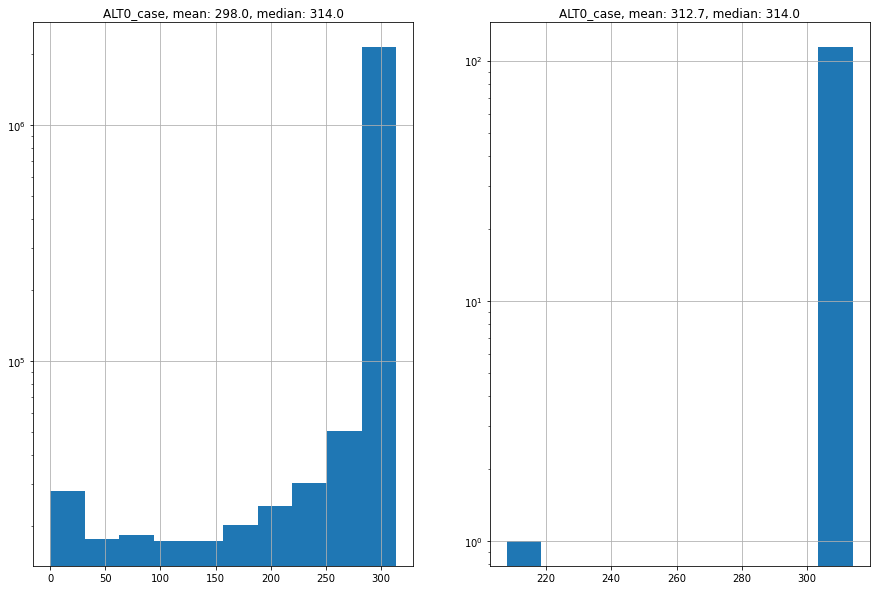

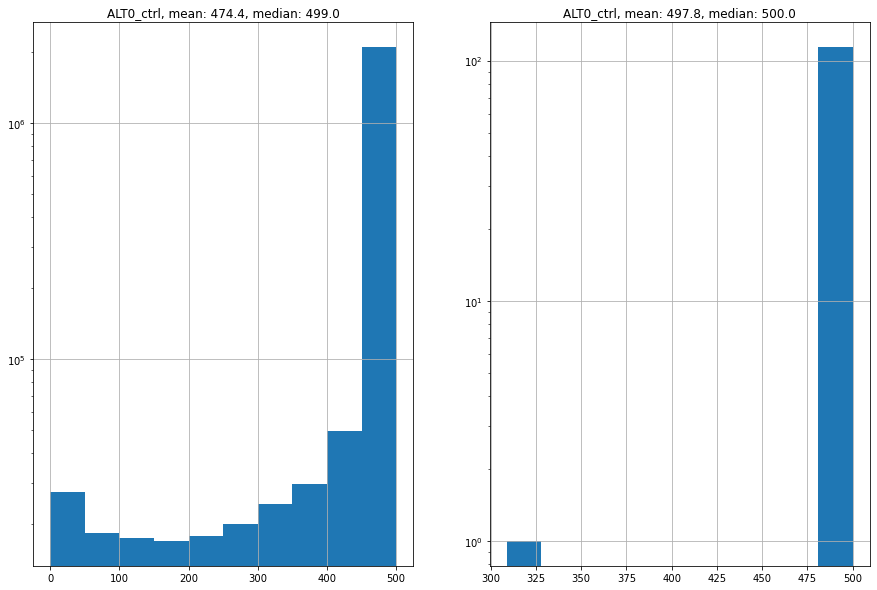

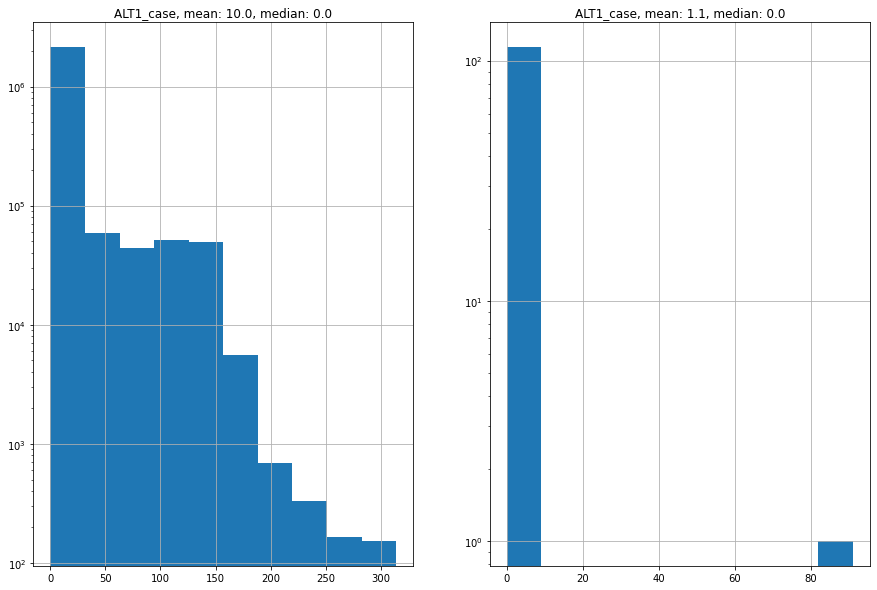

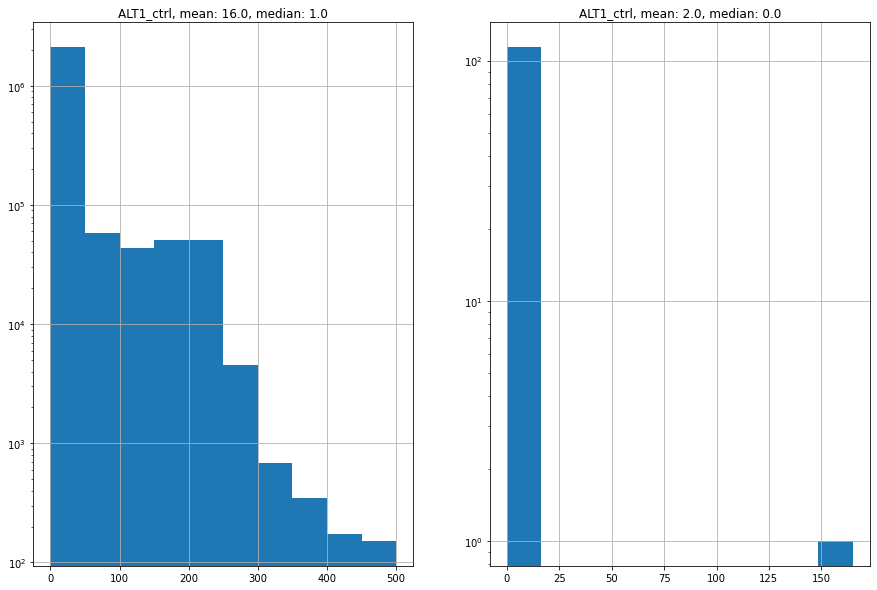

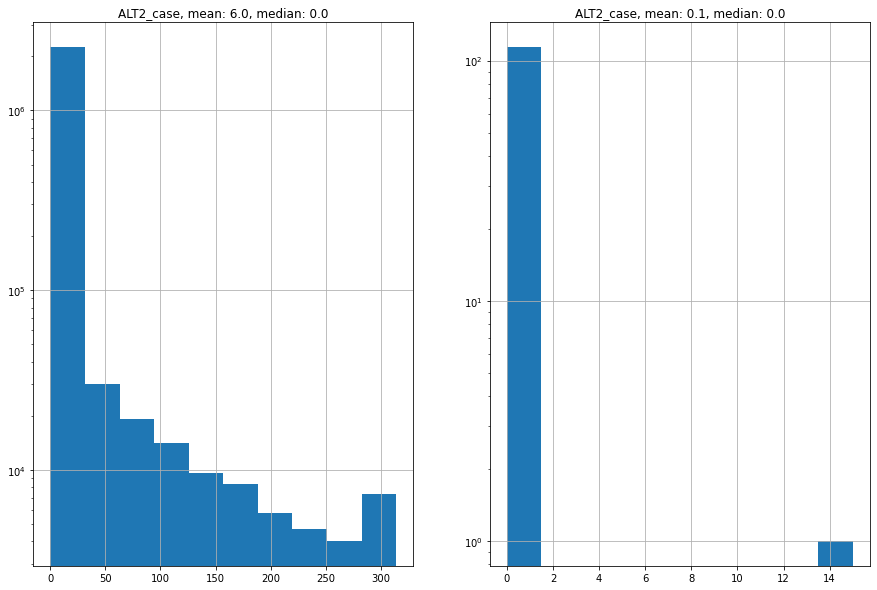

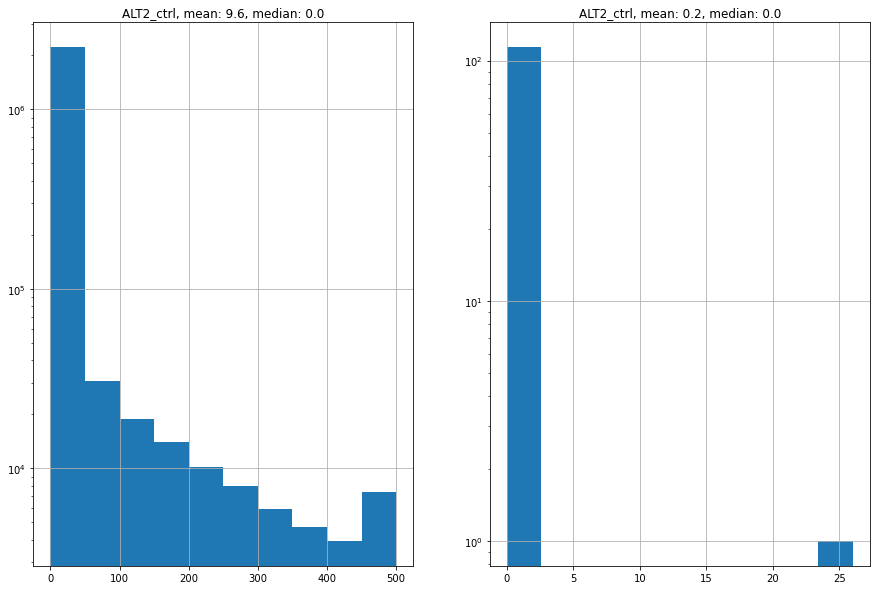

In [27]:
for column in ['ALT0_case','ALT0_ctrl',	'ALT1_case','ALT1_ctrl',	'ALT2_case'		,	'ALT2_ctrl']:
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    plt.title(f'{column}, mean: {pdf_case_control[column].mean().round(1)}, median: {pdf_case_control[column].median().round(1)}')
    pdf_case_control[column].hist(log=True)
    plt.subplot(1,2,2)
    plt.title(f'{column}, mean: {pathogenic_merge_on_RS[column].mean().round(1)}, median: {pathogenic_merge_on_RS[column].median().round(1)}')
    pathogenic_merge_on_RS[column].hist(log=True)

# Splitting the merge on RS into Case and Control

In [28]:
case_merge_on_RS = merge_on_RS.loc[merge_on_RS['CLNSIG'] == 'Pathogenic']
control_merge_on_RS = merge_on_RS.loc[merge_on_RS['CLNSIG'] == 'Benign']

In [29]:
print(len(case_merge_on_RS))
print(len(control_merge_on_RS))

115
2605


# Splitting clinvar into Case and Control
CLNVI: "the variant's clinical sources reported as tag-value pairs of database and variant identifier"

In [30]:
case_clinvar = pdf_clinvar.loc[pdf_clinvar['CLNSIG'] == 'Pathogenic']
control_clinvar = pdf_clinvar.loc[pdf_clinvar['CLNSIG'] == 'Benign']

In [31]:
print(len(case_clinvar))
print(len(control_clinvar))

117747
83133


In [32]:
case_clinvar.columns

Index(['chrom', 'pos', 'id', 'ref', 'alt', 'qual', 'filter', 'format',
       'samples', 'ALLELEID', 'CLNDISDB', 'CLNDN', 'CLNHGVS', 'CLNREVSTAT',
       'CLNSIG', 'CLNVC', 'CLNVCSO', 'GENEINFO', 'MC', 'ORIGIN', 'OMIM_id',
       'RS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNVI', 'CLNSIGCONF',
       'CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL', 'DBVARID'],
      dtype='object')

# Exploring example from https://www.biorxiv.org/content/10.1101/311621v1.full.pdf

In [33]:
example = case_clinvar.loc[case_clinvar['RS'] == 'rs201108965']

In [34]:
example_OMIM = example['OMIM_id']
print(example_OMIM)

514649    OMIM:603194
514651    OMIM:608091
Name: OMIM_id, dtype: object


In [37]:
omim_mode_path = Path(os.path.abspath("database_exploration.ipynb")).parent.parent.parent/ 'data/omim_mode.txt'

In [45]:
omim_mode_df = pd.read_table(omim_mode_path, sep='\t', lineterminator='\n', names = ['OMIM_id', 'heritage'])

In [46]:
omim_mode_df.head()

,OMIM_id,heritage
0,OMIM:100050,X-linked
1,OMIM:100100,Recessive
2,OMIM:100200,Dominant
3,OMIM:100300,Dominant
4,OMIM:100600,Dominant


In [47]:
for OMIM_id in example_OMIM:
    print(omim_mode_df.loc[omim_mode_df['OMIM_id'] == OMIM_id])

          OMIM_id   heritage
3801  OMIM:603194  Recessive
          OMIM_id   heritage
4204  OMIM:608091  Recessive
